In [1]:
from utils import *

In [5]:
def plotAngleKDE(vxs, thre, bandwidth=10, p_size=16, plot=0):
    links = generateLinks(np.array(vxs)*p_size, thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    if plot==1:
        plt.figure(figsize=[12,4])
        ax = plt.subplot(131)
        ax.axis("off")
        visualize(vxs, links, p_size=p_size, thre=thre)
        ax = plt.subplot(132,projection="polar")
        ax.grid(False)
        ax.axis("off")
        plotAngleHist([x+180 for x in angles],ax=ax)
    a = np.array(angles).reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(a)
    s = np.linspace(-180,180,361)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    if plot==1:
        ax=plt.subplot(133)
        ax.plot(s, e)
    return s, e, a

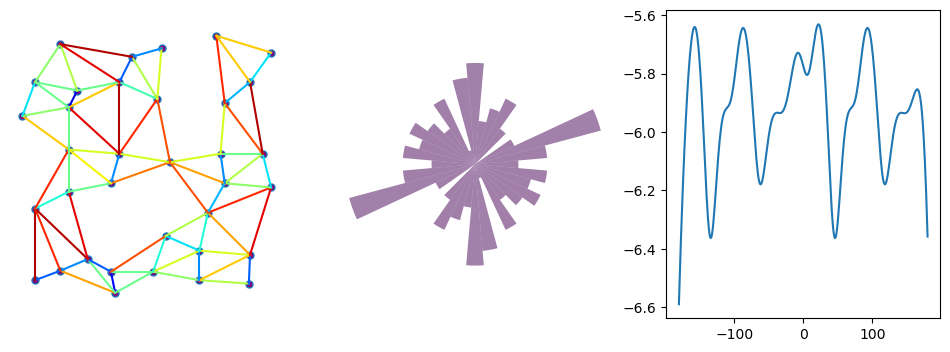

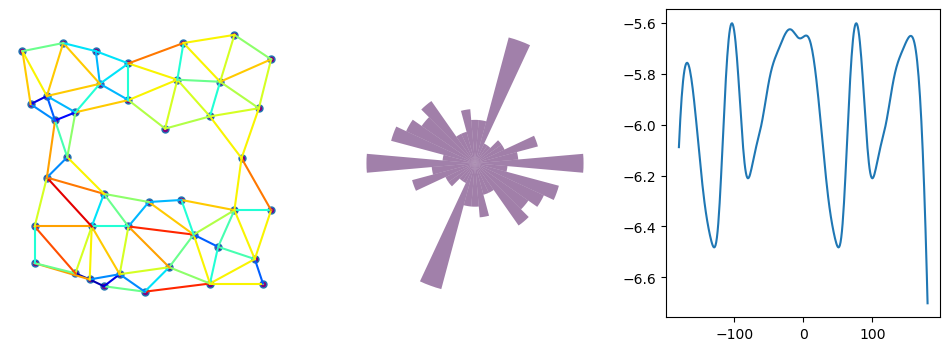

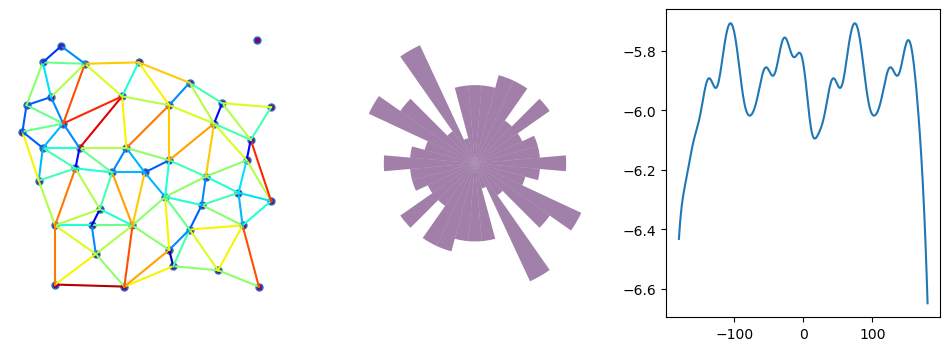

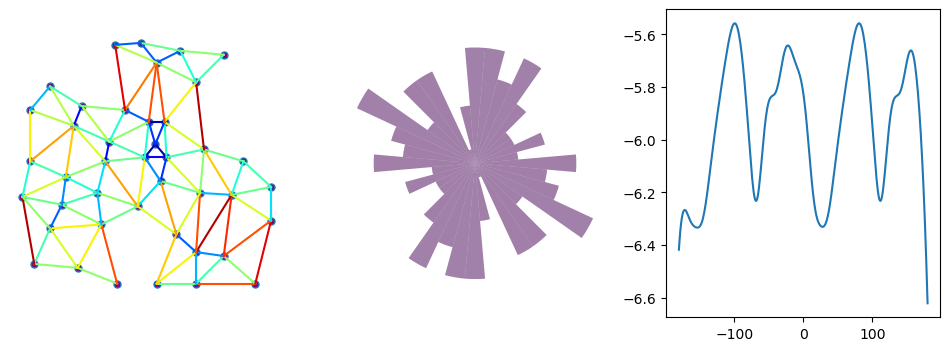

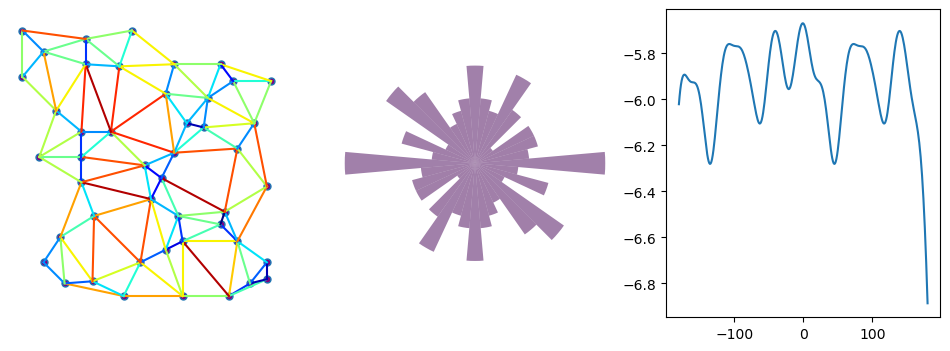

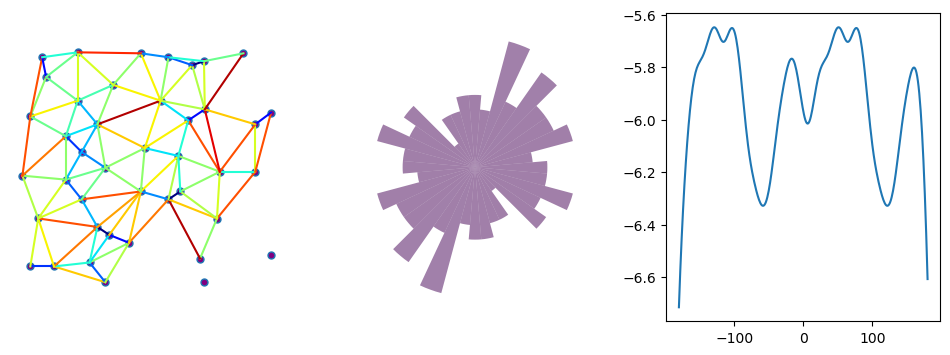

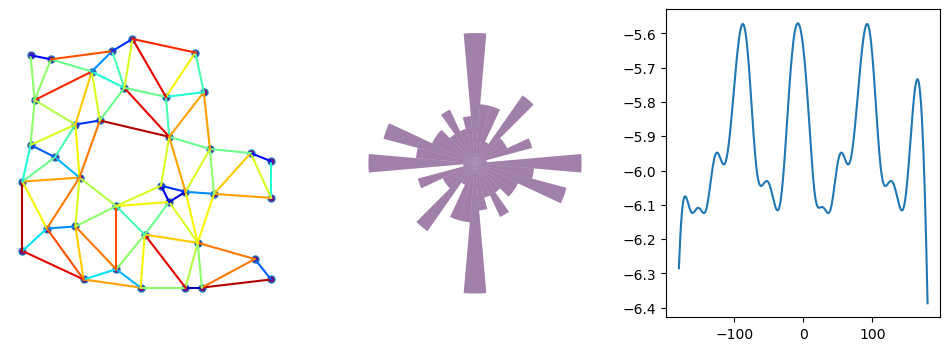

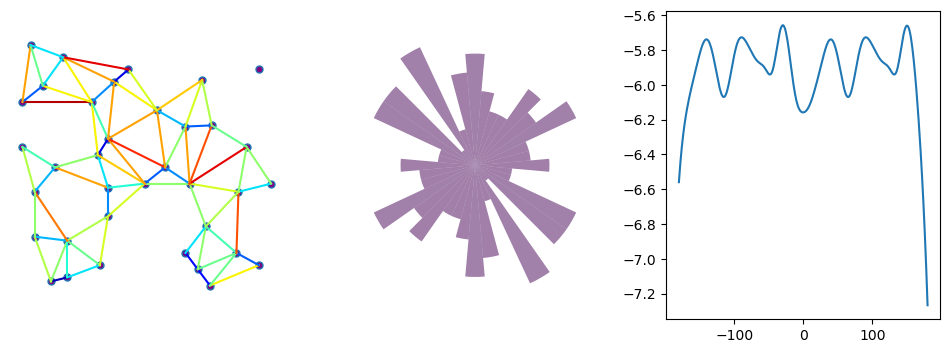

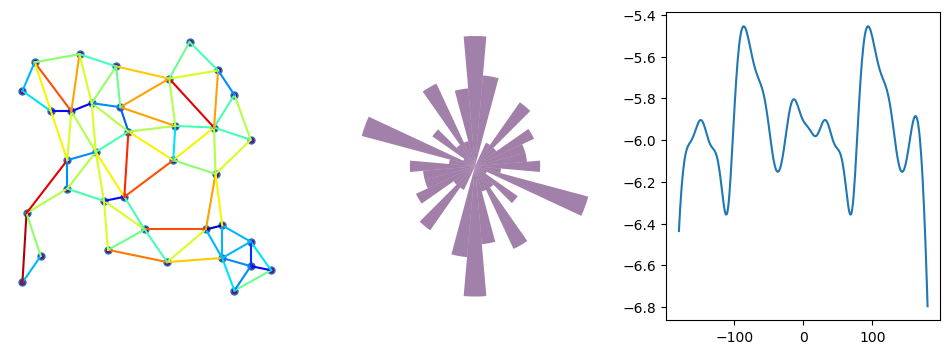

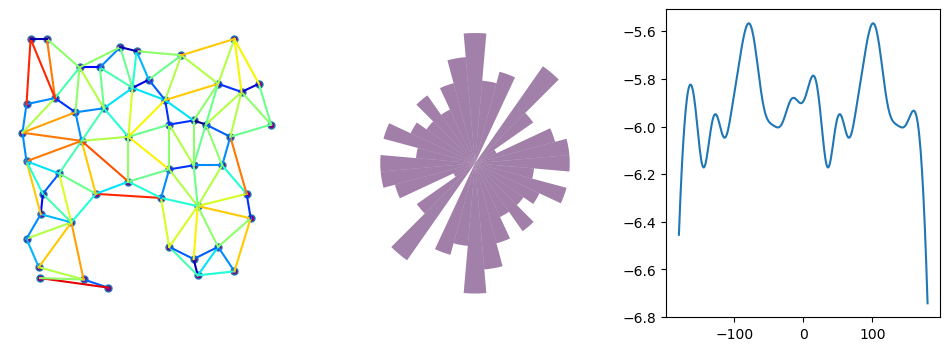

In [8]:
thre=[50,280]
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
for i in range(10):
    mat = np.load(test_1d[i])
    vxs = readVXSfromMat(mat)[0]
    s, e=plotAngleKDE(vxs, thre=thre)

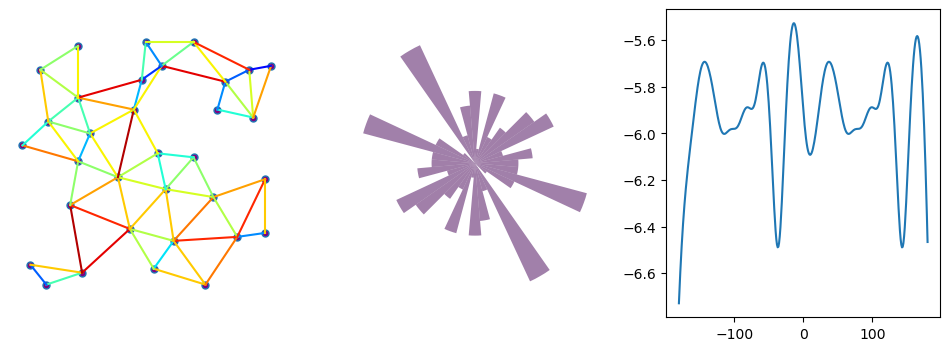

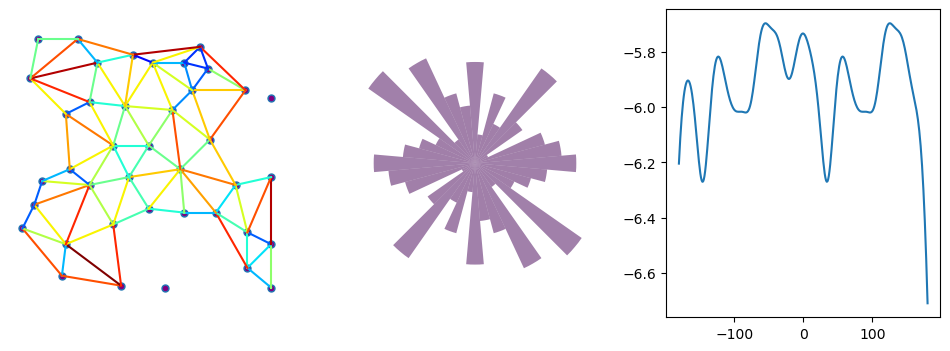

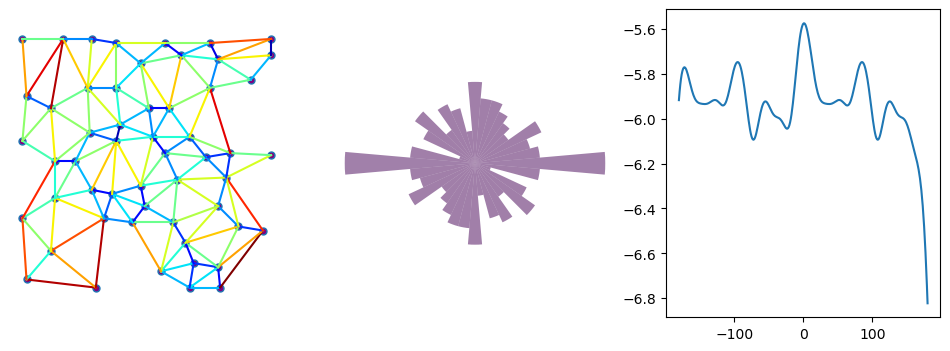

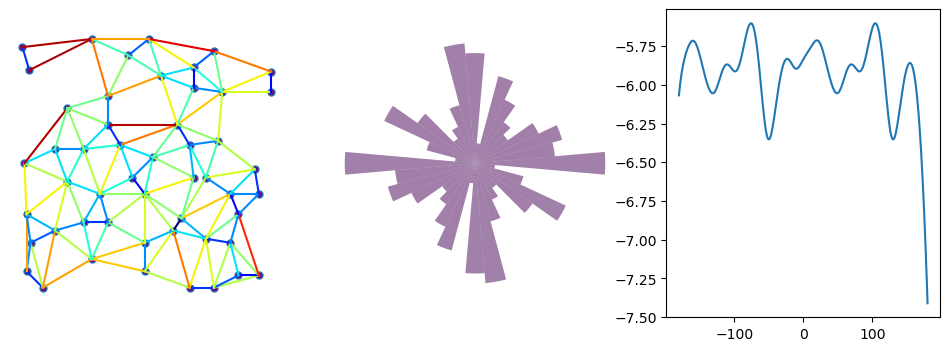

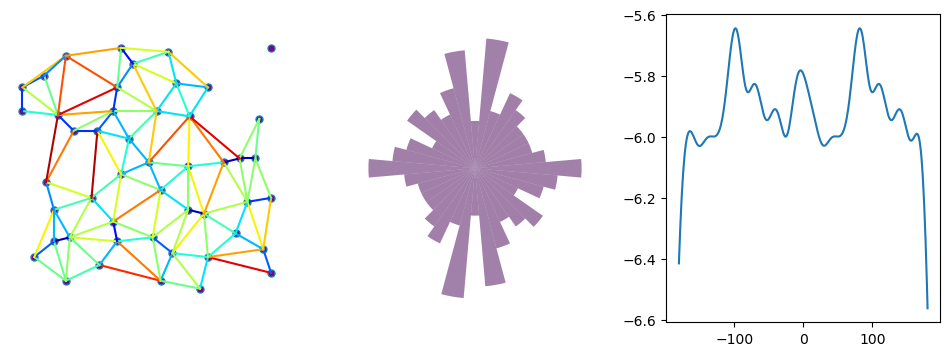

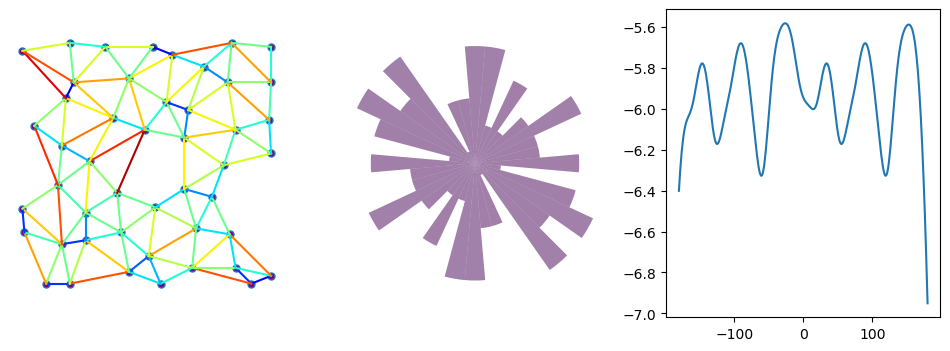

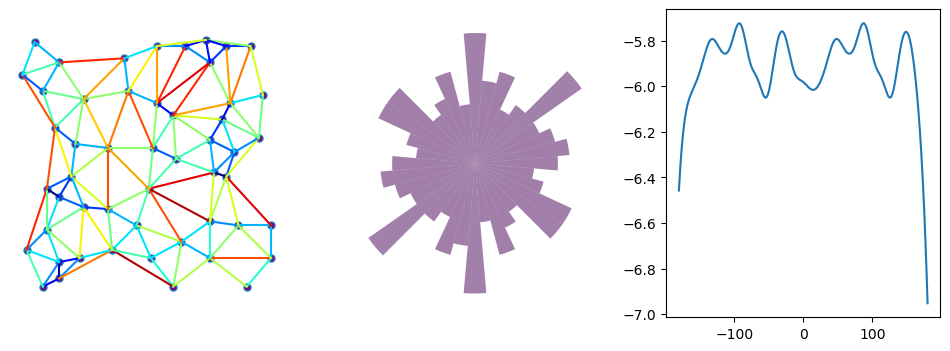

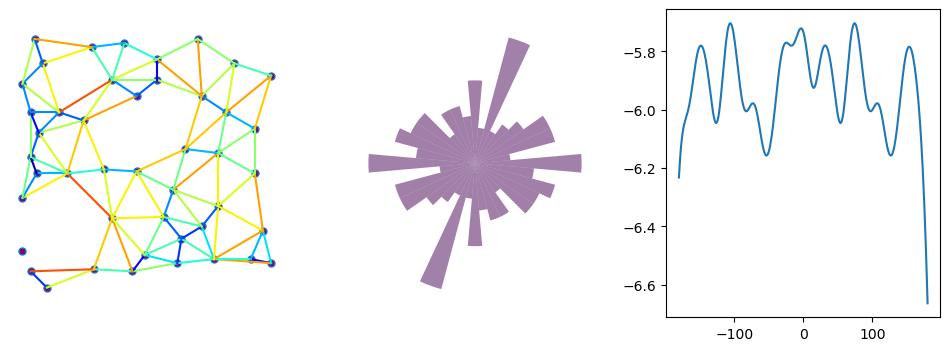

In [10]:
test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
for i in range(8):
    mat = np.load(test_2d[i])
    vxs = readVXSfromMat(mat)[0]
    s, e=plotAngleKDE(vxs, thre=thre)

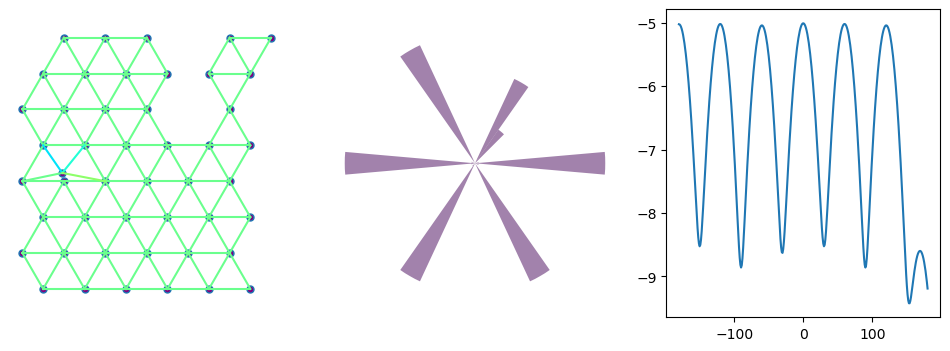

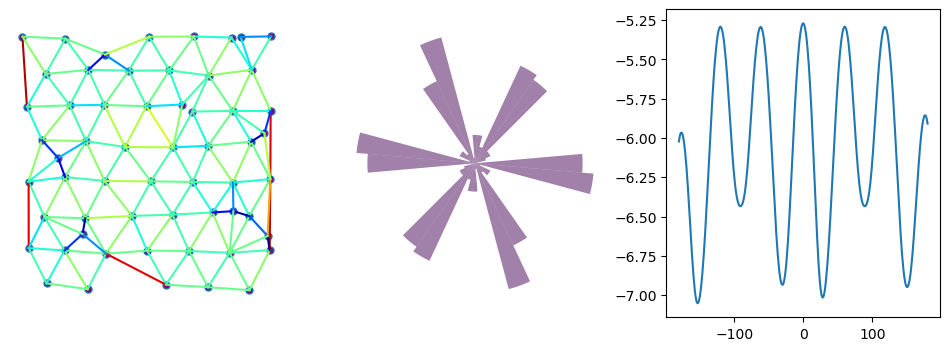

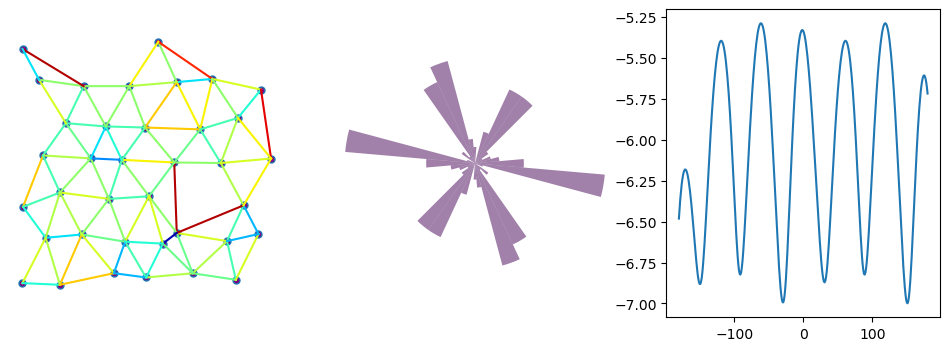

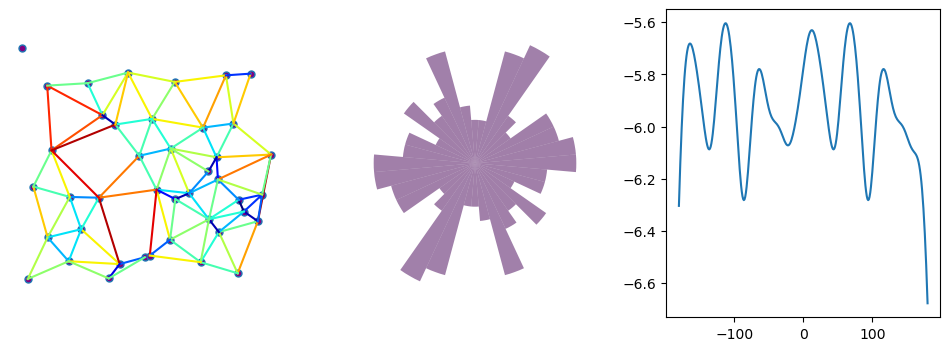

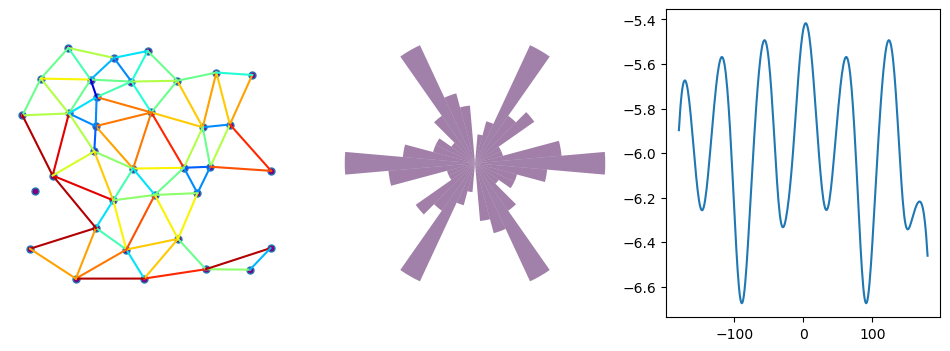

In [9]:
size = 16*64
for i in range(5):
    d = np.random.randint(160,180)/2
    vxs = sim2Df(64*16, d)
    loss =np.random.randint(10)
    vxs = jitter(vxs, rand=30*i, loss=loss, noise=np.random.randint(0,10))
    vxs = [ x for x in vxs if x[0] >= 0 and x[0] <= size and x[1] >= 0 and x[1] <= size]
    s, e=plotAngleKDE(vxs, thre=thre, p_size=1)

In [132]:
# from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
# from pyclustering.utils.metric import type_metric, distance_metric

angle_dist = lambda a, b: (a[0]-b[0]+360)%360 if (a[0]-b[0]+360)%360 < 180 else 360-(a[0]-b[0]+360)%360
metric = distance_metric(type_metric.USER_DEFINED, func=angle_dist)

# create K-Means algorithm with specific distance metric
start_centers = [[np.random.rand()*360] for x in range(10)]
kmeans_instance = kmeans(pangles, start_centers, metric=metric)

# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
centers = kmeans_instance.get_centers()

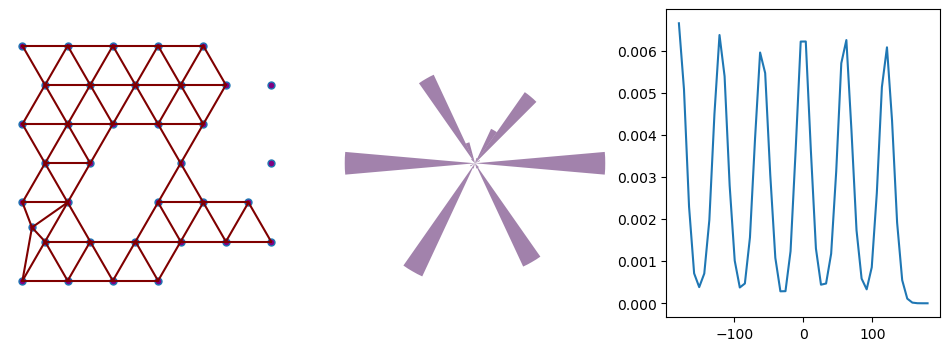

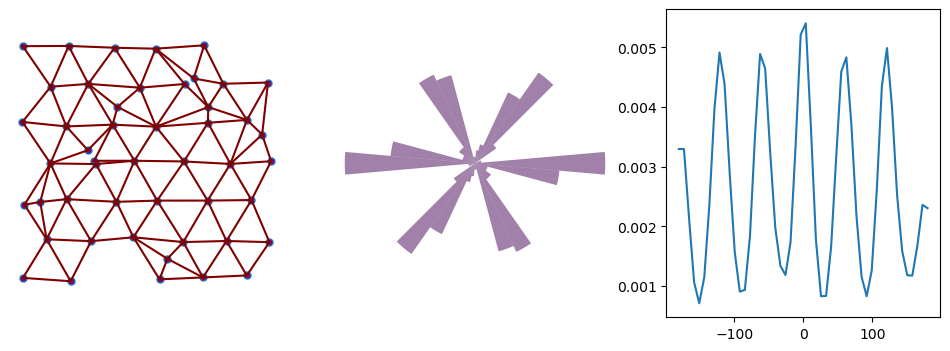

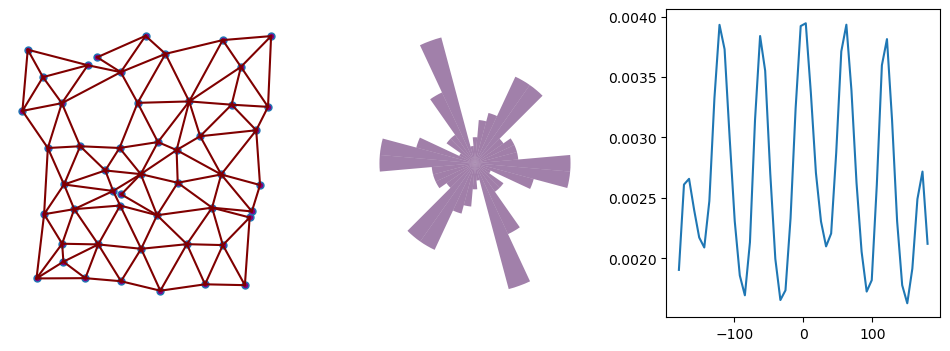

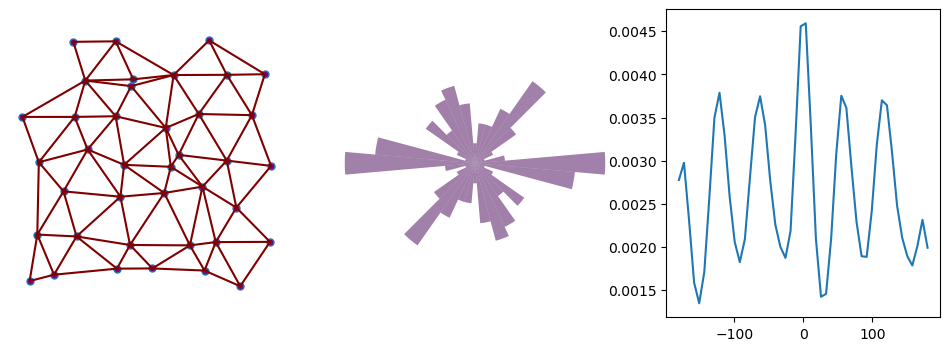

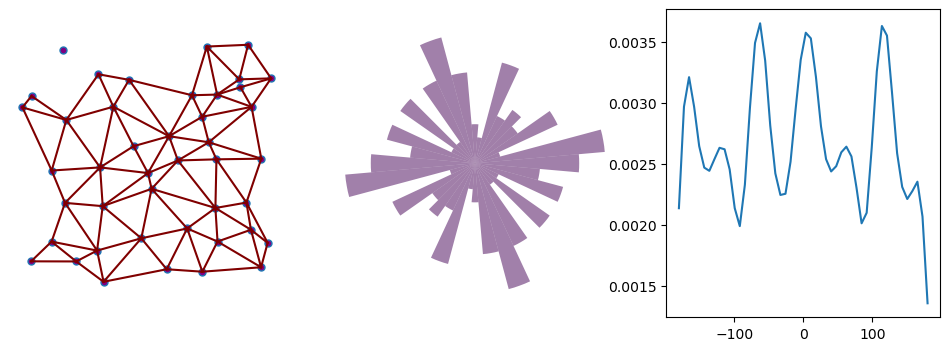

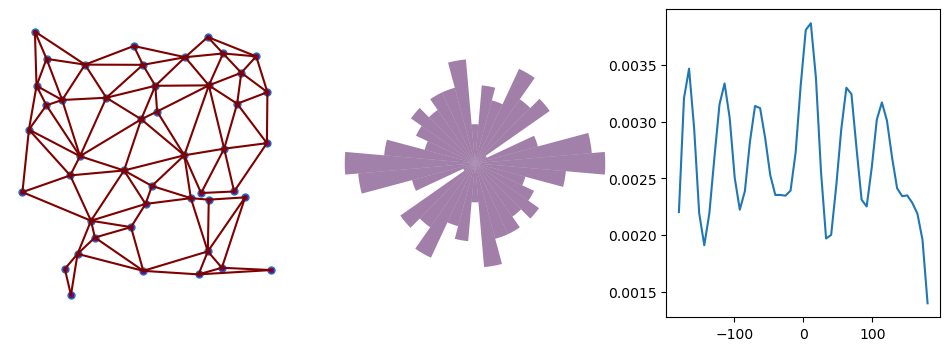

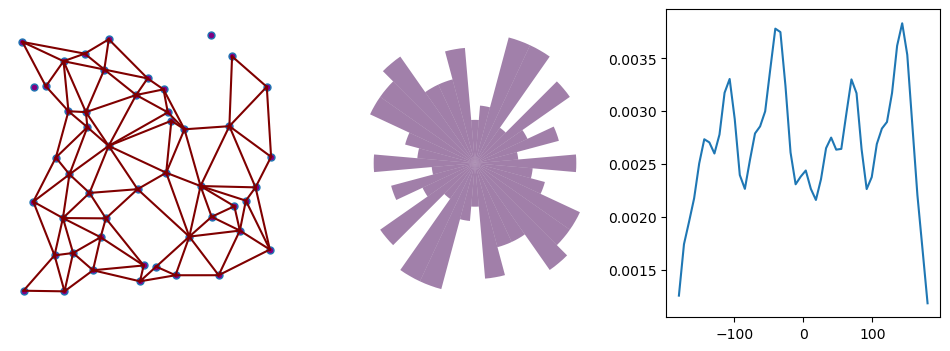

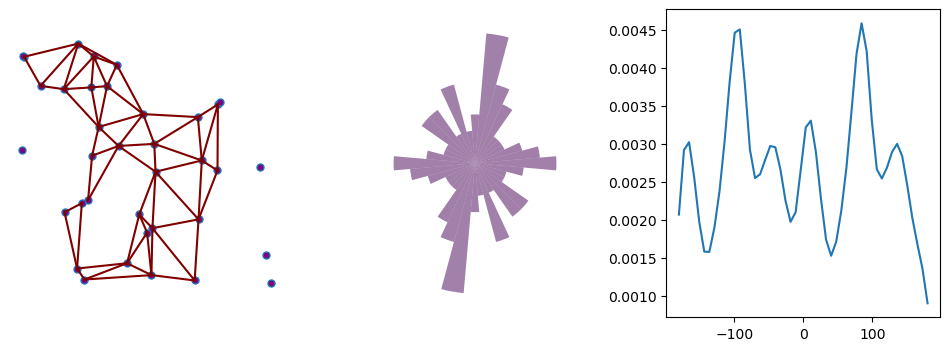

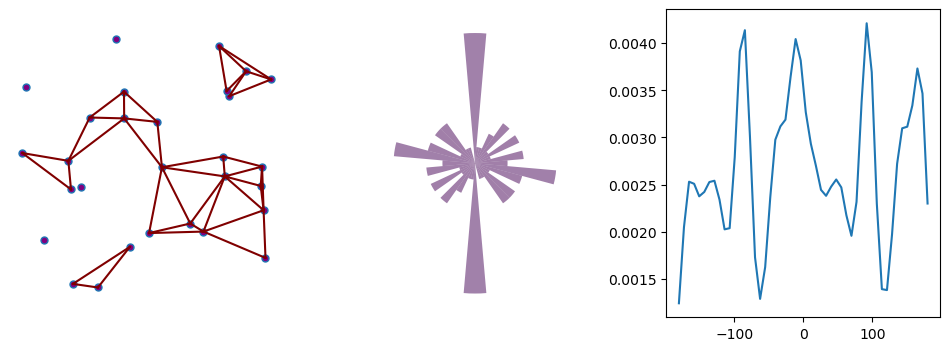

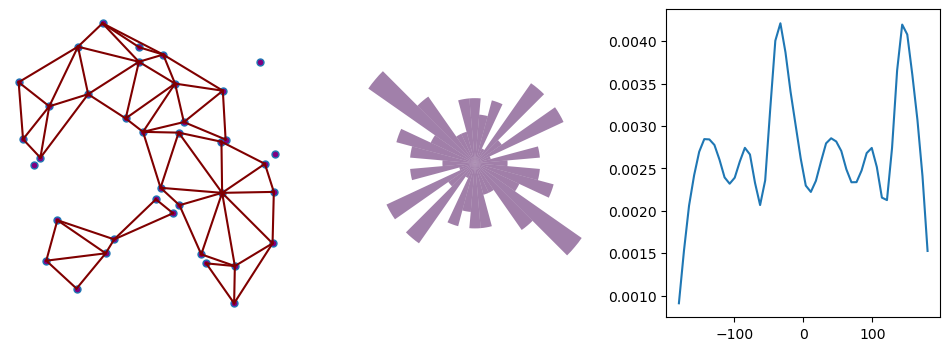

In [201]:
size = 16*64
for i in range(10):
    d = np.random.randint(160,180)/2
    vxs = sim2Df(64*16, d)
    loss =np.random.randint(10)
    vxs = jitter(vxs, rand=30*i, loss=loss, noise=np.random.randint(0,10))
    vxs = [ x for x in vxs if x[0] >= 0 and x[0] <= size and x[1] >= 0 and x[1] <= size]
    s, e=plotAngleKDE(vxs, thre=thre,p_size=1)

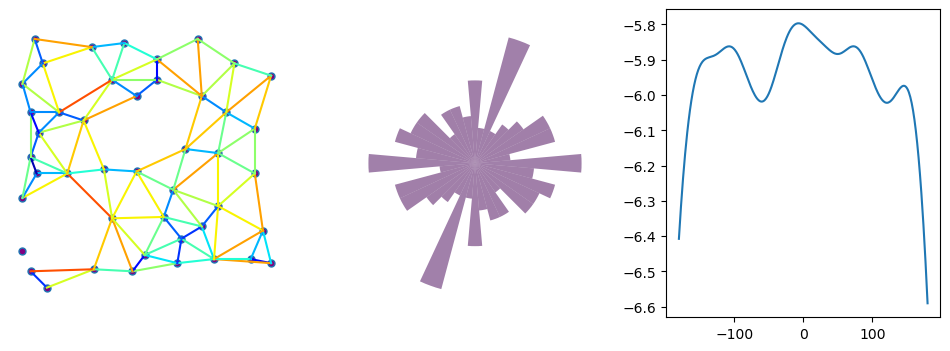

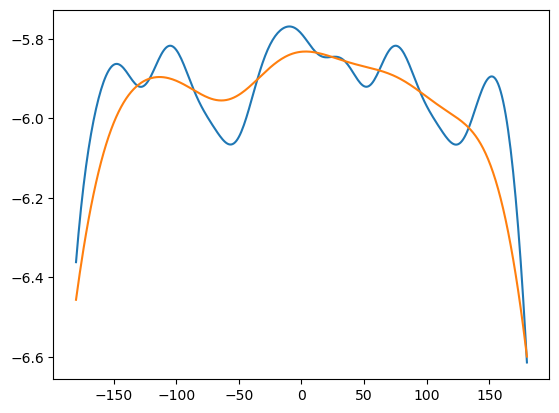

In [51]:
s, e, a=plotAngleKDE(vxs, thre=thre, bandwidth=20)
plt.figure()
for bandwidth in [15,30]:
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(a)
    s = np.linspace(-180,180,361)
    e = kde.score_samples(s.reshape(-1,1))
#ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    plt.plot(s, e)
s = np.linspace(-180,180,361)
probs = kde.score_samples(s.reshape(-1,1))
a = np.array(angles).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=20).fit(a)
#ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
#plt.plot(s+180, e)

In [25]:
def plotAngleKDE(vxs, thre, bandwidth=12, p_size=16, plot=0):
    links = generateLinks(np.array(vxs)*p_size, thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    angles = np.array(angles).reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(angles)
    s = np.linspace(-180,180,361)
    probs = kde.score_samples(s.reshape(-1,1))

    l_min, l_max = argrelextrema(probs, np.less)[0], argrelextrema(probs, np.greater)[0]
    #print(l_max)
    peaks_idx = [ x for x in l_max if x < l_max[1]+180 ][1:]
    #print(peaks_idx)
    n_peak = len(peaks_idx)
    peaks_prob = [probs[x] for x in peaks_idx]
    highest_peak = max(peaks_prob)
    peaks_angle = [peaks_idx[x] for x in np.argsort(peaks_prob)[-3:][::-1]]
    main_angle = np.abs(peaks_angle[1]-peaks_angle[0]) if np.abs(peaks_angle[1]-peaks_angle[0]) <= 90 else 180 - np.abs(peaks_angle[1]-peaks_angle[0])
    angles = np.sort(peaks_angle)
    angles = np.concatenate((angles[1:]-angles[:-1], [180-np.sum(angles[1:]-angles[:-1])]))
    largest_angle = np.max(angles)
    std_angles = np.std(angles)

    if plot:
        plt.figure(figsize=[12,4])
        ax = plt.subplot(131)
        ax.axis("off")
        visualize(vxs, links, p_size=p_size, thre=thre)
        ax = plt.subplot(132,projection="polar")
        ax.grid(False)
        ax.axis("off")
        plotAngleHist([x+180 for x in angles],ax=ax)
        ax=plt.subplot(133)
        ax.plot(s, probs)
    
    return n_peak, main_angle, highest_peak, largest_angle, std_angles

In [26]:
thre=[50,280]
t_r = 0.15
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
angle_1d=[]
for i in range(10):
    mat = np.load(test_1d[i])
    vxs = readVXSfromMat(mat,min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    angle_1d.append(plotAngleKDE(vxs, thre=thre, plot=0))

test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
angle_2d=[]
for i in range(8):
    mat = np.load(test_2d[i])
    vxs = readVXSfromMat(mat,min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    angle_2d.append(plotAngleKDE(vxs, thre=thre, plot=0))

test_un=glob.glob("../data/rendered/soma/Rand/*.npy")
angle_un=[]
for i in range(100):
    mat = np.load(test_un[i])
    vxs = readVXSfromMat(mat,min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    if len(vxs) > 20:
        angle_un.append(plotAngleKDE(vxs, thre=thre, plot=0))

In [15]:
angle_1d[0][1]

79

In [23]:
size = 16*64
angle_sim=[]
for i in range(20):
    d = np.random.randint(160,180)/2
    vxs = sim2Df(64*16, d)
    loss =np.random.randint(10)
    vxs = jitter(vxs, rand=30, loss=loss, noise=np.random.randint(0,10))
    vxs = [ x for x in vxs if x[0] >= 0 and x[0] <= size and x[1] >= 0 and x[1] <= size]
    angle_sim.append(plotAngleKDE(vxs, thre=thre,p_size=1, plot=0))

size = 16*64
angle_sim2=[]
for i in range(20):
    d = np.random.randint(160,180)/2
    vxs = sim2Df(64*16, d)
    loss =np.random.randint(10)
    vxs = jitter(vxs, rand=150, loss=loss, noise=np.random.randint(0,10))
    vxs = [ x for x in vxs if x[0] >= 0 and x[0] <= size and x[1] >= 0 and x[1] <= size]
    angle_sim2.append(plotAngleKDE(vxs, thre=thre,p_size=1, plot=0))

angle_rand=[]
for i in range(20):
    vxs = simRand(size=65*16, n=np.random.randint(40,60))
    angle_rand.append(plotAngleKDE(vxs, thre=thre, p_size=1, plot=0))

In [58]:
thre=[50,280]

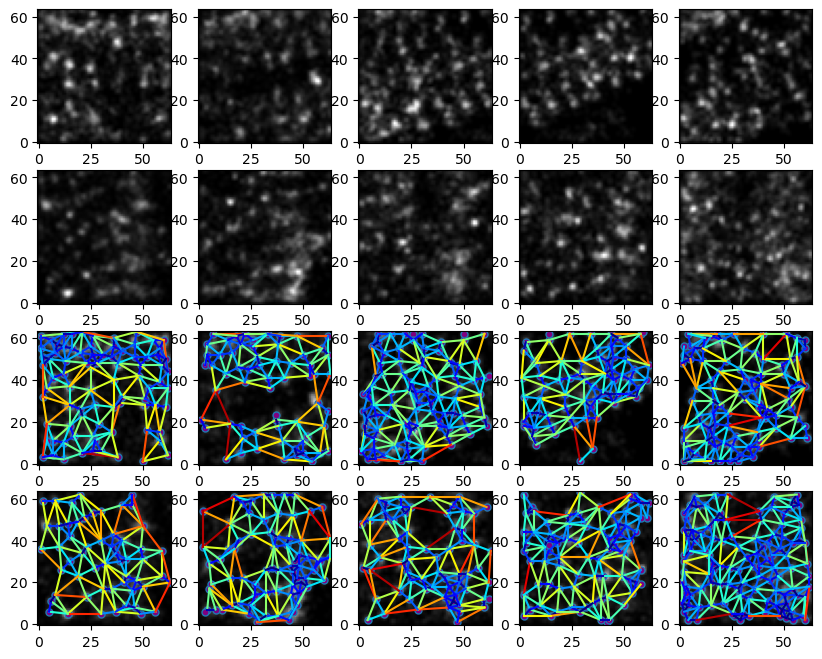

In [75]:
plt.figure(figsize=(10,8))
p_size=16
test = glob.glob("../data/rendered/soma/1D/*.npy")
for i in range(10):
    plt.subplot(4, 5, i+1)
    mat = np.load(test[i])
    g = cv2.getGaussianKernel(3, sigma=1)
    kernel = g*g.T
    nimg = scipy.signal.fftconvolve(mat, kernel, mode='same')
    plt.imshow(nimg)
    plt.gca().invert_yaxis()
    vxs = readVXSfromMat(mat, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    #vxs = readVXSfromLoc(test[i])[0]
    links = generateLinks(vxs * p_size, thre=thre, plot=0)
    plt.subplot(4, 5, i+11)
    plt.imshow(nimg)
    visualize(vxs, links,thre=thre, p_size=16)


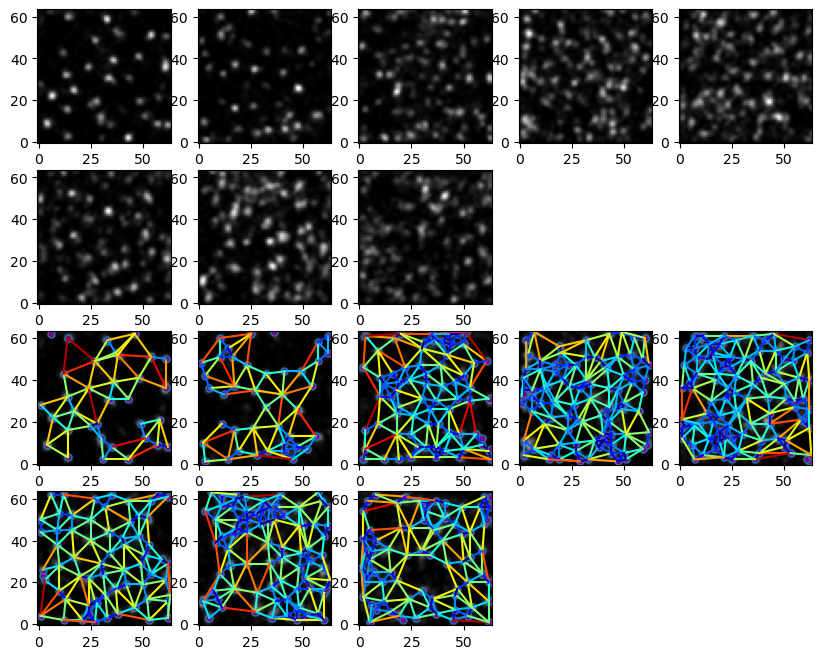

In [80]:
plt.figure(figsize=(10,8))
p_size=16
test = glob.glob("../data/rendered/soma/2D/*.npy")
for i in range(8):
    plt.subplot(4, 5, i+1)
    mat = np.load(test[i])
    g = cv2.getGaussianKernel(3, sigma=1)
    kernel = g*g.T
    nimg = scipy.signal.fftconvolve(mat, kernel, mode='same')
    plt.imshow(nimg)
    plt.gca().invert_yaxis()
    vxs = readVXSfromMat(mat, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    #vxs = readVXSfromLoc(test[i])[0]
    links = generateLinks(vxs * p_size, thre=thre, plot=0)
    plt.subplot(4, 5, i+11)
    plt.imshow(nimg)
    visualize(vxs, links,thre=thre, p_size=16)

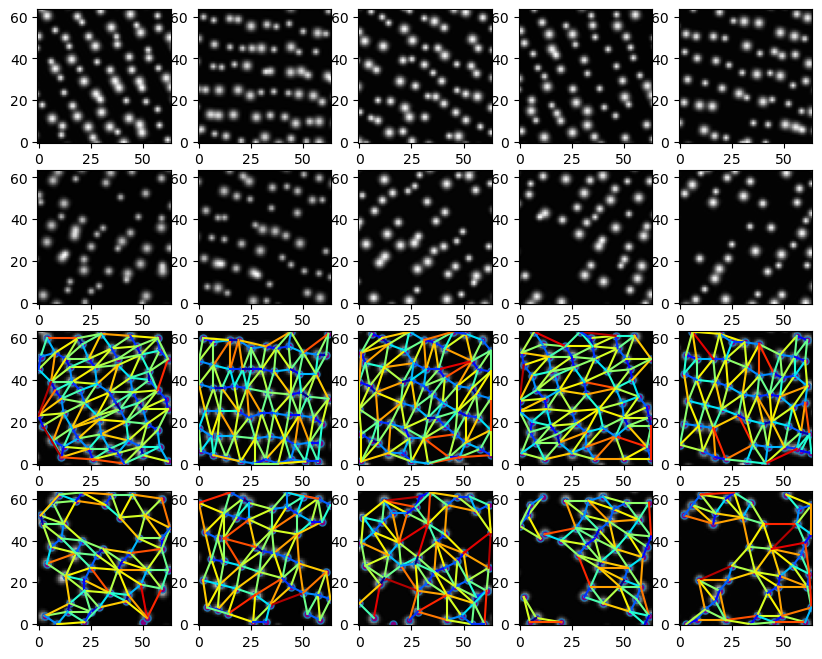

In [134]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(4, 5, i+1)
    vxs_1D = sim1D(size=int(2*64*16/p_size), spacex=int(100/p_size), spacey=int(187/p_size))
    vxs_1D = jitter(vxs_1D,loss=10*i)
    sim_1D = genPic(np.zeros([128,128]), vxs_1D, 5, theta=np.random.rand()*180, rand=2, randz=3)
    img = sim_1D[32:32+64,32:32+64]
    
    plt.imshow(img)
    plt.gca().invert_yaxis()
    
    plt.subplot(4, 5, i+11)
    plt.imshow(img)
    vxs = readVXSfromMat(img, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    links = generateLinks(vxs * p_size, thre=thre, plot=0)
    visualize(vxs, links,thre=thre, p_size=16)
    #stats_1D = statsForVXS(vxs_1D, plot=0, thre=[140,220])

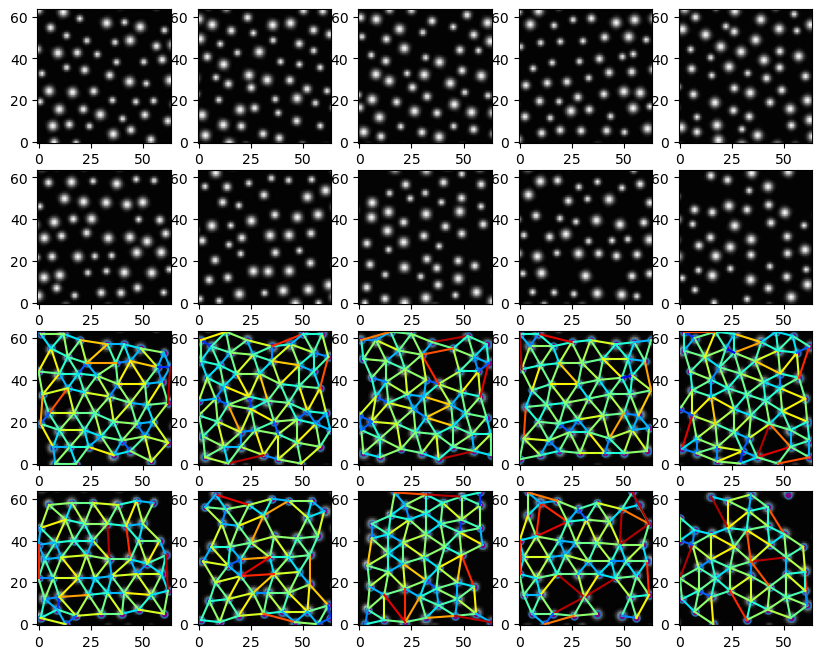

In [135]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(4, 5, i+1)
    vxs_2D = sim2D(size=int(2*64*16/p_size), space=int(187/p_size/2))
    vxs_2D = jitter(vxs_2D,loss=10*i)
    sim_2D = genPic(np.zeros([128,128]), vxs_2D, 5, theta=np.random.rand()*180, rand=2, randz=3)
    img = sim_2D[32:32+64,32:32+64]
    
    plt.imshow(img)
    plt.gca().invert_yaxis()
    
    plt.subplot(4, 5, i+11)
    plt.imshow(img)
    vxs = readVXSfromMat(img, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    links = generateLinks(vxs * p_size, thre=thre, plot=0)
    visualize(vxs, links,thre=thre, p_size=16)
    #stats_1D = statsForVXS(vxs_1D, plot=0, thre=[140,220])

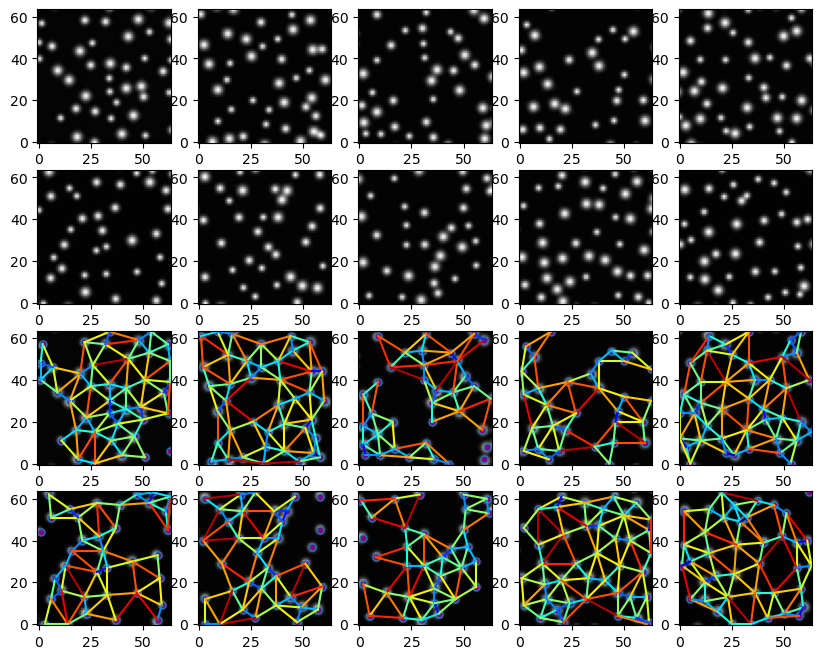

In [91]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(4, 5, i+1)
    vxs_2D = simRandD(int(2*64*16/p_size), d=np.array(110/p_size),n=200)
    sim_2D = genPic(np.zeros([128,128]), vxs_2D, 5, theta=np.random.rand()*180, rand=2, randz=3)
    img = sim_2D[32:32+64,32:32+64]
    
    plt.imshow(img)
    plt.gca().invert_yaxis()
    
    plt.subplot(4, 5, i+11)
    plt.imshow(img)
    vxs = readVXSfromMat(img, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    links = generateLinks(vxs * p_size, thre=thre, plot=0)
    visualize(vxs, links,thre=thre, p_size=16)
    #stats_1D = statsForVXS(vxs_1D, plot=0, thre=[140,220])

In [108]:
np.random.randint(40,60)

46

In [127]:
stats_sim1=[]
for i in range(100):
    vxs_1D = sim1D(size=int(2*64*16/p_size), spacex=int(100/p_size), spacey=int(187/p_size))
    vxs_1D = jitter(vxs_1D,loss=jj)
    sim_1D = genPic(np.zeros([128,128]), vxs_1D, 5, theta=np.random.rand()*180, rand=2, randz=3)
    img = sim_1D[32:32+64,32:32+64]
    vxs = readVXSfromMat(img, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    #links = generateLinks(vxs * p_size, thre=thre, plot=0)
    #angle_sim1.append(plotAngleKDE(vxs, thre=thre, plot=0))
    stats_sim1.append(statsForVXS(vxs*p_size, plot=0, thre=thre))
    

stats_sim2=[]
for i in range(100):
    vxs_2D = sim2D(size=int(2*64*16/p_size), space=int(187/p_size/2))
    vxs_2D = jitter(vxs_2D,loss=jj)
    sim_2D = genPic(np.zeros([128,128]), vxs_2D, 5, theta=np.random.rand()*180, rand=2, randz=3)
    img = sim_2D[32:32+64,32:32+64]
    
    vxs = readVXSfromMat(img, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    #angle_sim2.append(plotAngleKDE(vxs, thre=thre, plot=0))
    stats_sim2.append(statsForVXS(vxs*p_size, plot=0, thre=thre))
    #stats_1D = statsForVXS(vxs_1D, plot=0, thre=[140,220])

stats_rand=[]
for i in range(100):
    vxs_2D = simRand(size=int(2*64*16/p_size), n=4*np.random.randint(40,60))
    sim_2D = genPic(np.zeros([128,128]), vxs_2D, 5, theta=np.random.rand()*180, rand=2, randz=3)
    img = sim_2D[32:32+64,32:32+64]
    
    vxs = readVXSfromMat(img, min_sigma=0.5,max_sigma=1,num_sigma=20, threshold_rel=t_r,plot=0)[0]
    #angle_rand.append(plotAngleKDE(vxs, thre=thre, plot=0))
    stats_rand.append(statsForVXS(vxs*p_size, plot=0, thre=thre))
    #stats_1D = statsForVXS(vxs_1D, plot=0, thre=[140,220])

In [126]:
thre=[50,280]
test_1d=glob.glob("../data/rendered/soma/1D/*.npy")
stats_1d=[]
for i in range(10):
    mat = np.load(test_1d[i])
    vxs = readVXSfromMat(mat)[0]
    stats_1d.append(statsForVXS(vxs*p_size, thre=thre, plot=0))

test_2d=glob.glob("../data/rendered/soma/2D/*.npy")
stats_2d=[]
for i in range(8):
    mat = np.load(test_2d[i])
    vxs = readVXSfromMat(mat)[0]
    stats_2d.append(statsForVXS(vxs*p_size, thre=thre, plot=0))

test_un=glob.glob("../data/rendered/soma/Rand/*.npy")
stats_un=[]
for i in range(200):
    mat = np.load(test_un[i])
    vxs = readVXSfromMat(mat)[0]
    if len(vxs) < 5:
            continue
    stats_un.append(statsForVXS(vxs*p_size, thre=thre, plot=0))

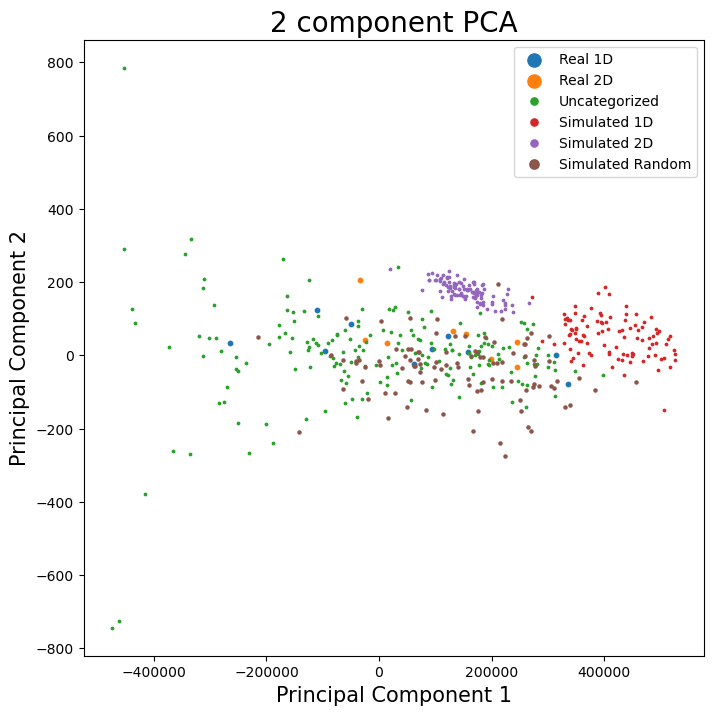

In [132]:
from sklearn.decomposition import PCA
# all_stats=stats[0].copy()
# all_stats.extend(stats[1].copy())
# all_stats = np.array(all_stats)
pca = PCA(n_components=2)

pca_un = pca.fit_transform(np.nan_to_num(stats_un))
principalDf = pd.DataFrame(data = pca_un
             , columns = ['PCA1', 'PCA2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#ax.scatter(pca_un[:,0], pca_un[:,1],s=4, alpha=0.5)
i=0
ss=[10,10,3,3,3,5]
for stat in [stats_1d,stats_2d,stats_un, stats_sim1, stats_sim2,stats_rand]:
    pca_data = pca.transform(np.nan_to_num(np.array(stat)))
    ax.scatter(pca_data[:,0], pca_data[:,1],s=ss[i])
    i+=1

plt.legend(["Real 1D","Real 2D","Uncategorized","Simulated 1D","Simulated 2D","Simulated Random"],markerscale=3, scatterpoints=1)

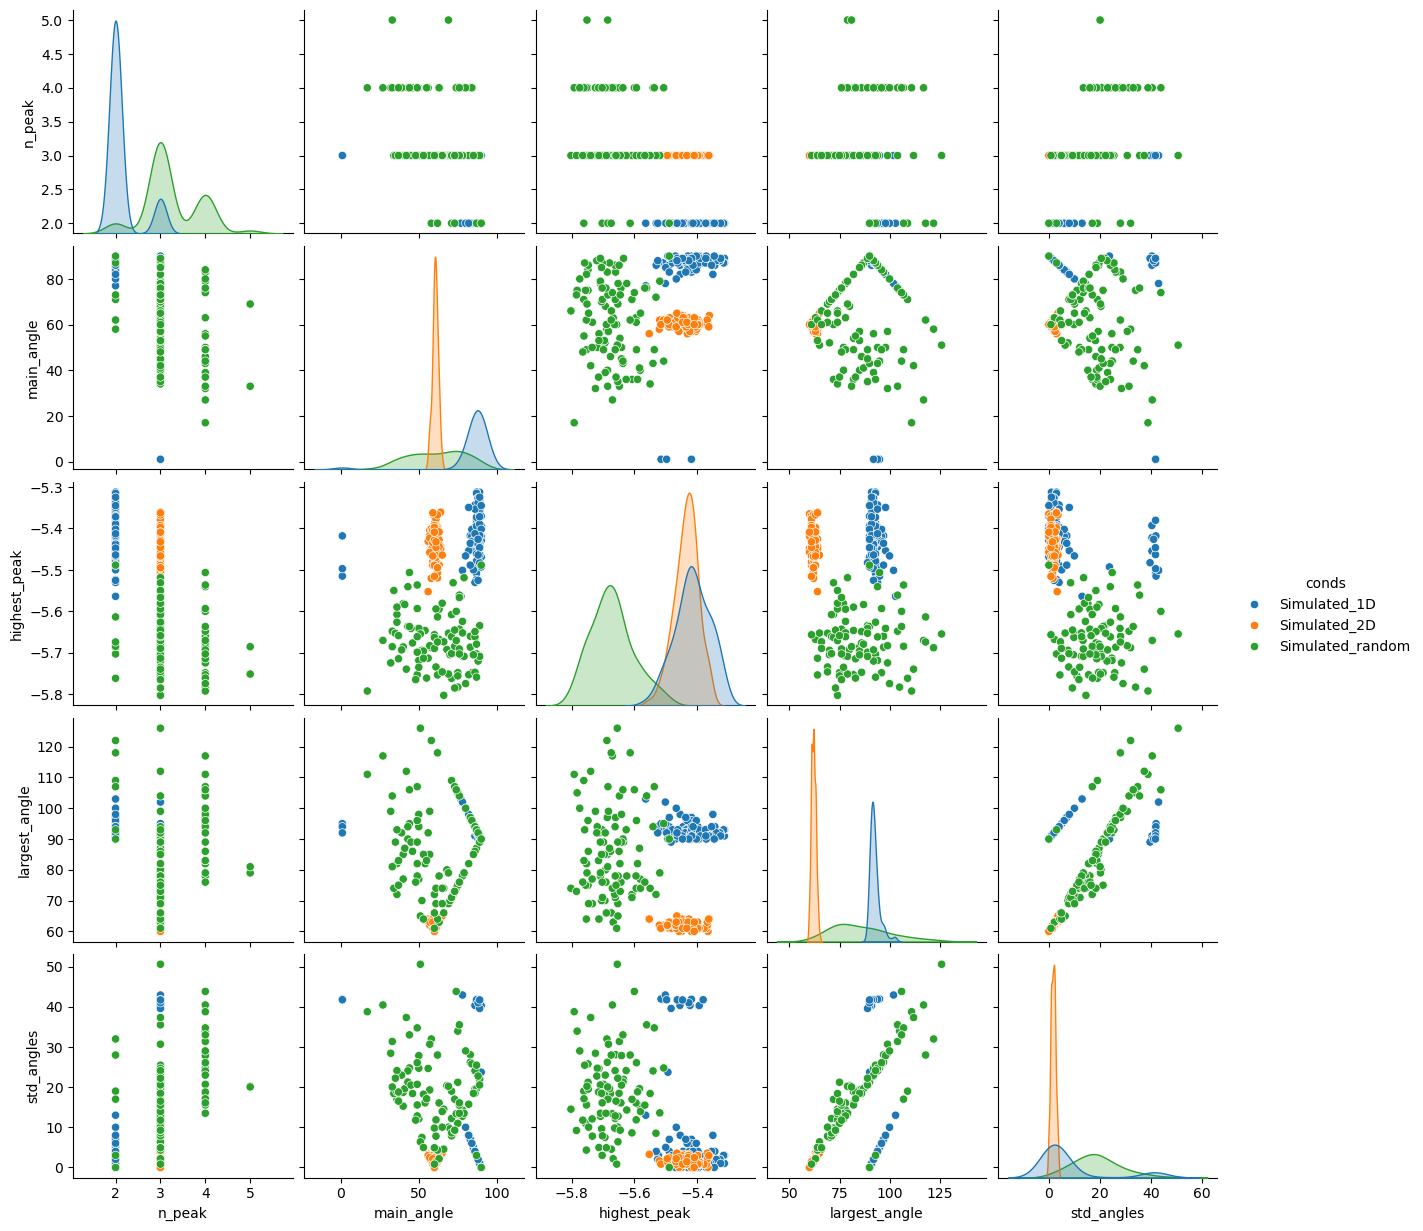

In [112]:
all_res = []
# df = pd.DataFrame(
#             np.array(angle_1d),
#             columns=[
#                 "n_peak",
#                 "main_angle",
#                 "highest_peak", 
#                 "largest_angle", 
#                 "std_angles"])#.append(pd.Series(np.array(stats_2d)[:,i+4], name="2D"), how="outer")
# df["conds"]="1D"
# all_res.append(df)
# df = pd.DataFrame(
#             np.array(angle_2d),
#             columns=[
#                 "n_peak",
#                 "main_angle",
#                 "highest_peak", 
#                 "largest_angle", 
#                 "std_angles"])#.append(pd.Series(np.array(stats_2d)[:,i+4], name="2D"), how="outer")
# df["conds"]="2D"
# all_res.append(df)
# df = pd.DataFrame(
#             np.array(angle_un),
#             columns=[
#                 "n_peak",
#                 "main_angle",
#                 "highest_peak", 
#                 "largest_angle", 
#                 "std_angles"])#.append(pd.Series(np.array(stats_2d)[:,i+4], name="2D"), how="outer")
# df["conds"]="Uncategorized"
# all_res.append(df)
df = pd.DataFrame(
           np.array(angle_sim1),
            columns=[
                "n_peak",
                "main_angle",
                "highest_peak", 
                "largest_angle", 
                "std_angles"])#.append(pd.Series(np.array(stats_2d)[:,i+4], name="2D"), how="outer")
df["conds"]="Simulated_1D"
all_res.append(df)
df = pd.DataFrame(
            np.array(angle_sim2),
            columns=[
                "n_peak",
                "main_angle",
                "highest_peak", 
                "largest_angle", 
                "std_angles"])#.append(pd.Series(np.array(stats_2d)[:,i+4], name="2D"), how="outer")
df["conds"]="Simulated_2D"
all_res.append(df)
df = pd.DataFrame(
            np.array(angle_rand),
            columns=[
                "n_peak",
                "main_angle",
                "highest_peak", 
                "largest_angle", 
                "std_angles"])#.append(pd.Series(np.array(stats_2d)[:,i+4], name="2D"), how="outer")
df["conds"]="Simulated_random"
all_res.append(df)
df_res = pd.concat(all_res)
sns.pairplot(df_res, hue='conds',diag_kind='kde')

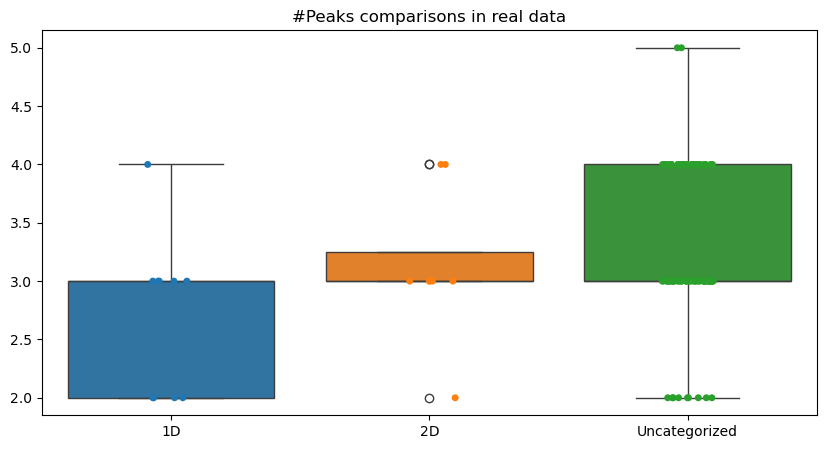

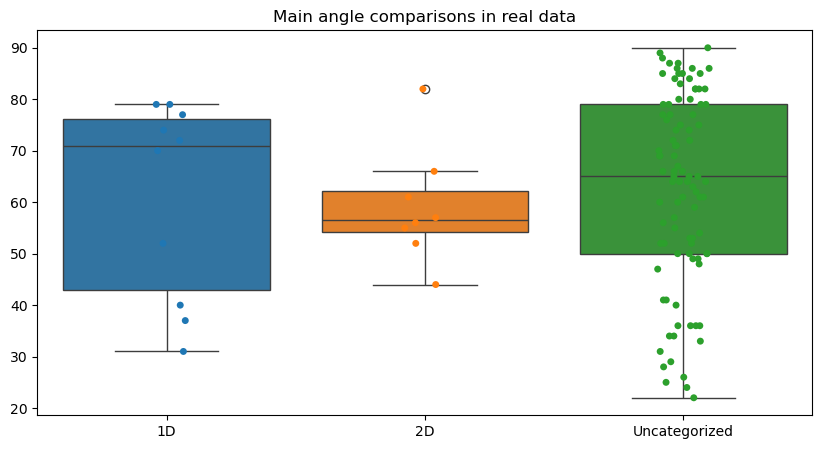

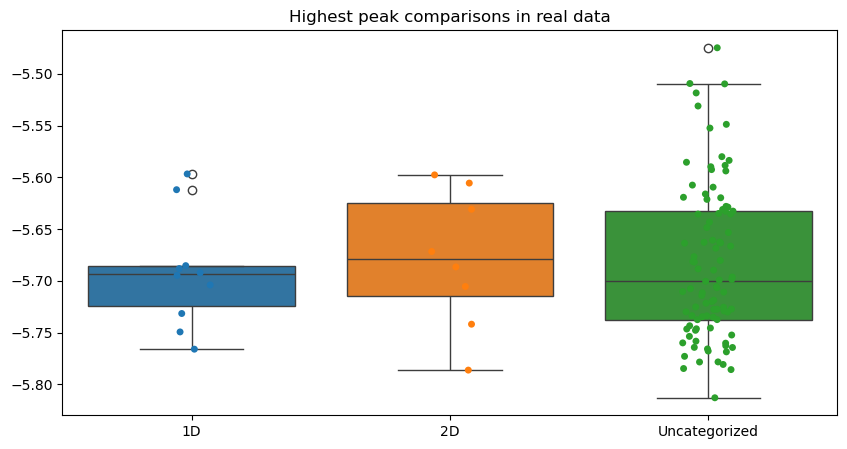

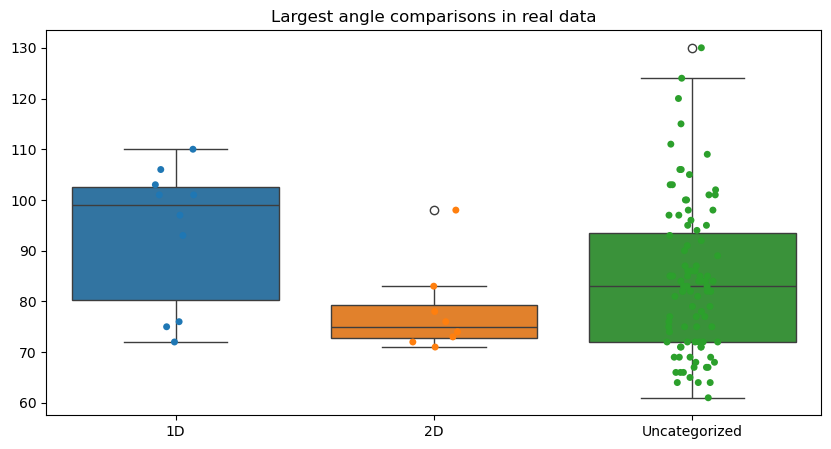

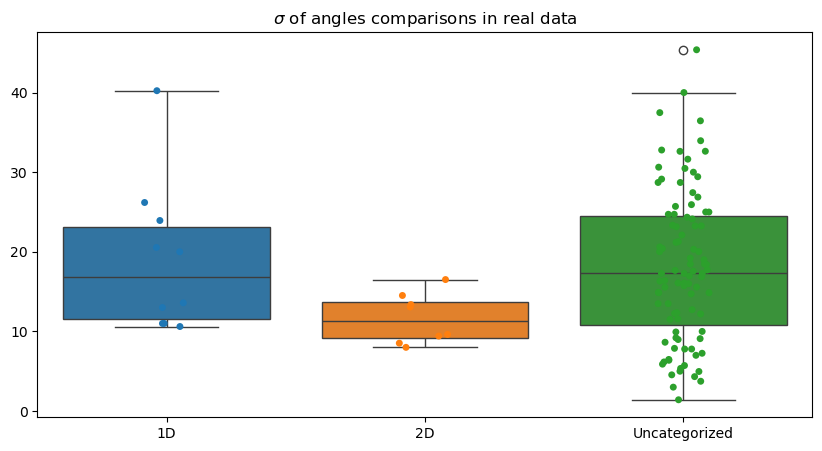

In [27]:
labels=["#Peaks","Main angle","Highest peak","Largest angle", r"$\sigma$ of angles"]
for i in range(5):
    plt.figure(figsize=[10,5])
    df = pd.Series(np.array(angle_1d)[:,i], name="1D").to_frame().join(pd.Series(np.array(angle_2d)[:,i], name="2D"), how="outer")
    df = df.join(pd.Series(np.array(angle_un)[:,i], name="Uncategorized"), how="outer")
    # df = df.join(pd.Series(np.array(angle_sim)[:,i], name="Simulated"), how="outer")
    # df = df.join(pd.Series(np.array(angle_sim2)[:,i], name="Simulated with more randomness"), how="outer")
    # df = df.join(pd.Series(np.array(angle_rand)[:,i], name="Purely Random"), how="outer")

    sns.boxplot(data=df) 
    sns.stripplot(data=df)
    plt.title(labels[i]+" comparisons in real data")

In [ ]:
s = np.linspace(-180,180)
e = kde.score_samples(s.reshape(-1,1))
#ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
ax=plt.subplot(133)
ax.plot(s, e)

In [154]:
angle_dist = lambda a, b: (a-b+360)%360 if (a-b+360)%360 < 180 else 360-(a-b+360)%360

def kmeans(data, k, starts, max_iter=10):
    centers = [ 0 for x in range(k) ] 
    iters = 0
    while True:
        tmp = [[] for x in range(k)]
        for i in data:
            min_dist=360
            for j in range(k):
                if angle_dist(i,starts[j]) < min_dist:
                    min_dist=angle_dist(i,starts[j])
                    closest_center=j
            tmp[closest_center].append(min_dist)
        centers = [np.mean(x) for x in tmp]
        print(centers)
        if iters > max_iter:
            break
        if centers==starts:
            break
        iters+=1
        starts=centers
    return(centers)


In [162]:
bins=36
counts, bins = np.histogram(angles, bins=np.linspace(0, 360, bins + 1))

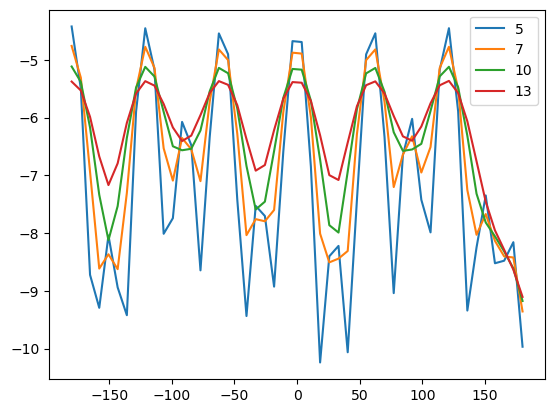

In [185]:
a = np.array(angles).reshape(-1, 1)
for b in [5,7,10,13]:
    kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(a)
    s = np.linspace(-180,180)
    e = kde.score_samples(s.reshape(-1,1))
    #ax[1, 0].fill(X_plot[:, 0], np.exp(e), fc="#AAAAFF")
    plt.plot(s, e)
plt.legend([5,7,10,13])

In [155]:
#kmeans(pangles,6,[np.random.rand()*360 for x in range(6)])

[7.20392995380795, 11.527871602054429, nan, 35.265403813184435, 32.40641047540965, 38.683257201606835]
[68.95652679405991, nan, nan, nan, 2.4064104754097, 80.28748532830312]
[8.93971397244594, nan, nan, nan, 63.1442689339477, 65.10563693040966]
[69.5713398537963, nan, nan, nan, 3.1274561123337428, 80.28748532830306]
[9.554527032182333, nan, nan, nan, 63.853590251572065, 65.10563693040966]
[70.17615595321176, nan, nan, nan, 3.836777429958101, 80.28748532830306]
[10.15934313159779, nan, nan, nan, 64.55137788923513, 65.10563693040966]
[70.77113764450665, nan, nan, nan, 4.534565067621171, 80.28748532830306]
[10.754324822892697, nan, nan, nan, 65.23781938644832, 65.10563693040966]
[71.35644483675608, nan, nan, nan, 80.15530287226443, 5.088824108795703]
[11.339632015142126, nan, nan, nan, 65.2378193864483, 65.78306608549]
[71.93223483888767, nan, nan, nan, 5.221006564834351, 79.61005617322274]


c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[71.93223483888767, nan, nan, nan, 5.221006564834351, 79.61005617322274]

In [139]:
pangles = [ x+180 for x in angles]

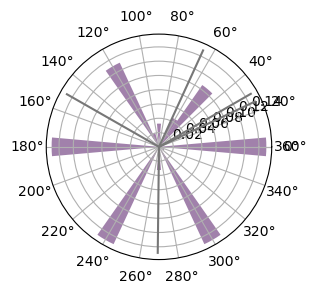

In [171]:
ax = plt.subplot(122,projection="polar")
#ax.grid(False)
#x.axis("off")
ax.vlines([ x[0]/180*np.pi for x in centers], 0, 0.15, colors="#777777", zorder=3)
plotAngleHist(pangles,ax=ax)


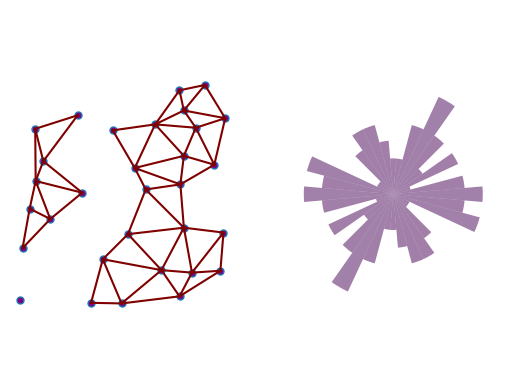

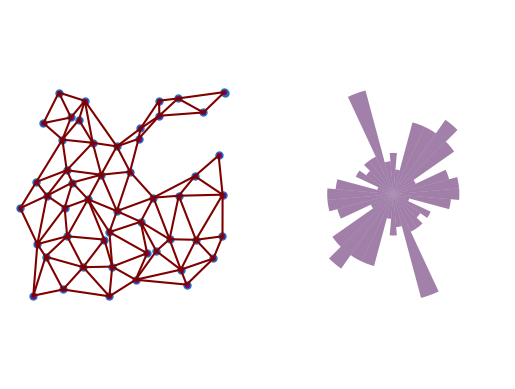

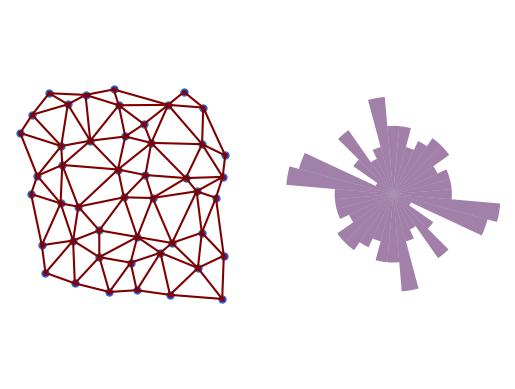

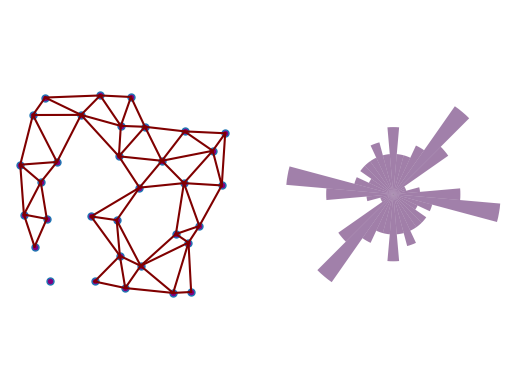

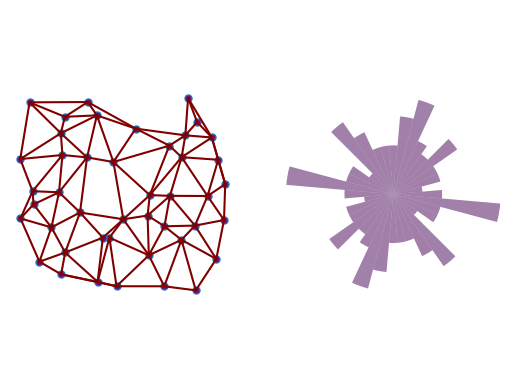

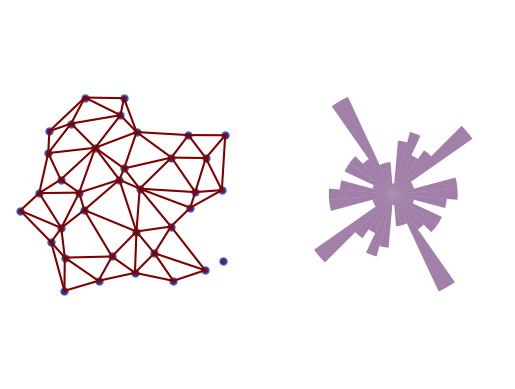

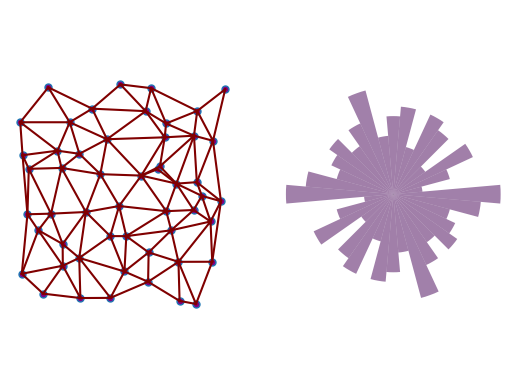

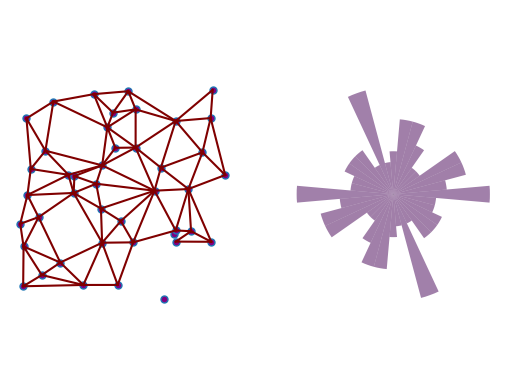

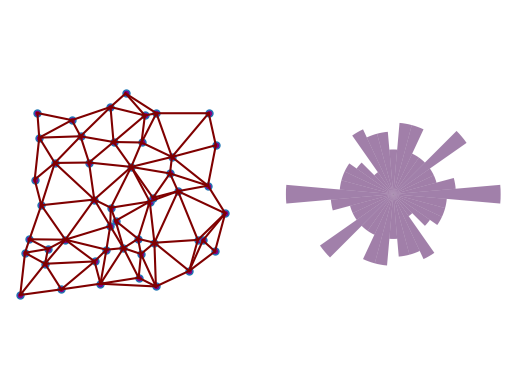

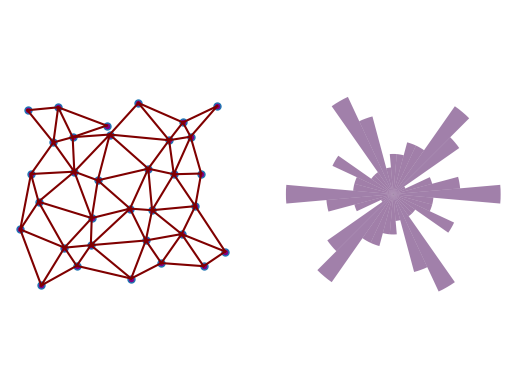

In [22]:
size = 16*64
for i in range(10):
    d = np.random.randint(160,180)/2
    vxs = sim2Df(64*16, d)
    loss =np.random.randint(10)
    vxs = jitter(vxs, rand=120, loss=loss, noise=np.random.randint(0,10))
    vxs = [ x for x in vxs if x[0] >= 0 and x[0] <= size and x[1] >= 0 and x[1] <= size]
    links = generateLinks(np.array(vxs), thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    plt.figure()
    ax = plt.subplot(121)
    ax.axis("off")
    visualize(vxs, links, p_size=16, thre=thre)
    ax = plt.subplot(122,projection="polar")
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)

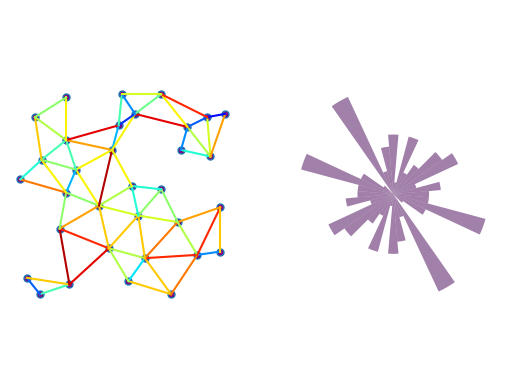

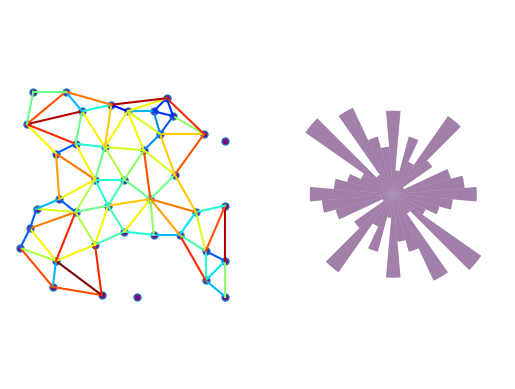

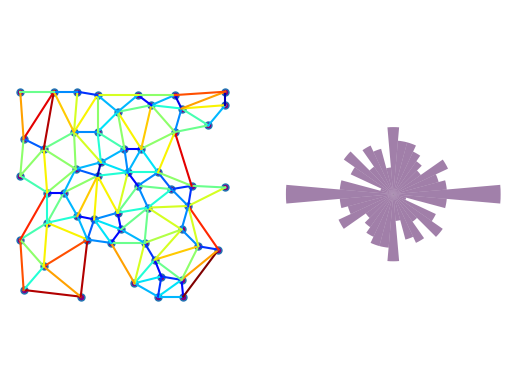

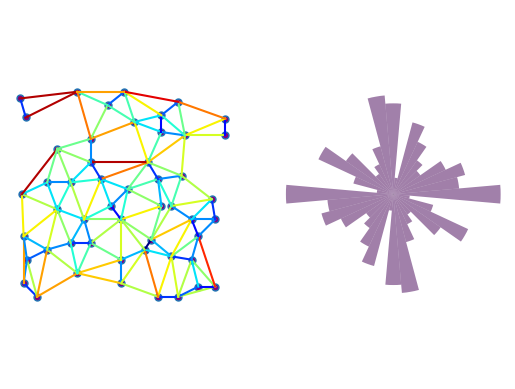

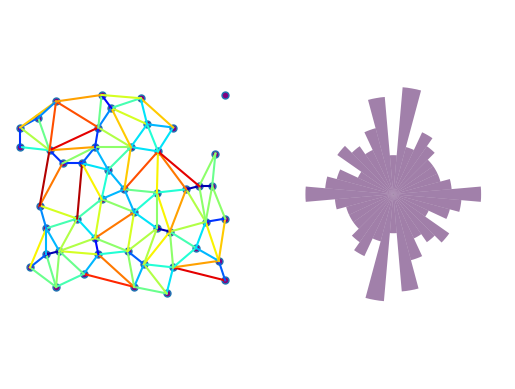

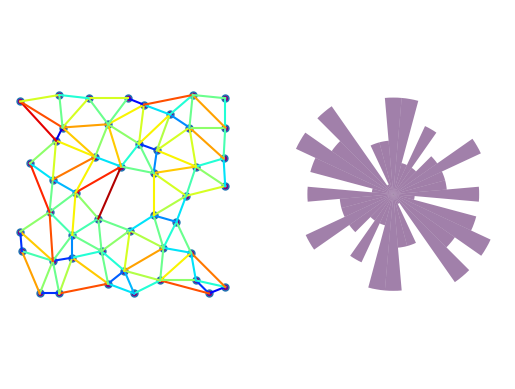

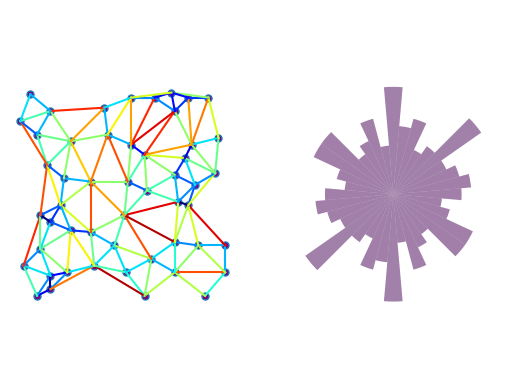

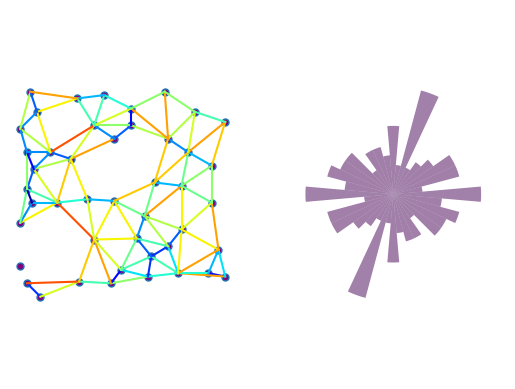

In [12]:
test=glob.glob("../data/rendered/soma/2D/*.npy")
for i in range(8):
    vxs = readVXSfromMat(np.load(test[i]))[0]
    links = generateLinks(vxs * 16, thre=thre, plot=0)
    angles = getTop3Angle(vxs, links)
    plt.figure()
    ax = plt.subplot(121)
    ax.axis("off")
    visualize(vxs, links, p_size=16, thre=thre)
    ax = plt.subplot(122,projection="polar")
    ax.grid(False)
    ax.axis("off")
    plotAngleHist([x+180 for x in angles],ax=ax)